In [1]:
# Let's load some other packages we need
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import time
%matplotlib inline
import nibabel as nib # common way of importing nibabel

In [88]:
# resting mri
mri_file = '/kaggle/input/d/genandlam/subj-1betas-session21/betas_session21.nii'
img = nib.load(mri_file)
print(type(img))

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


In [ ]:
def get_img(file_dir):
    img = nib.load(mri_file)
    return img

file=['/kaggle/input/d/genandlam/subj-1betas-session21/betas_session21.nii','']

In [89]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.memmap'>
(145, 186, 148, 125)


In [112]:
gender = pd.DataFrame({'subj': [1, 2,3,4,5,6], 'gender': ['M','F','F','F','F','M']})

In [113]:
gender

,subj,gender
0,1,M
1,2,F
2,3,F
3,4,F
4,5,F
5,6,M


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



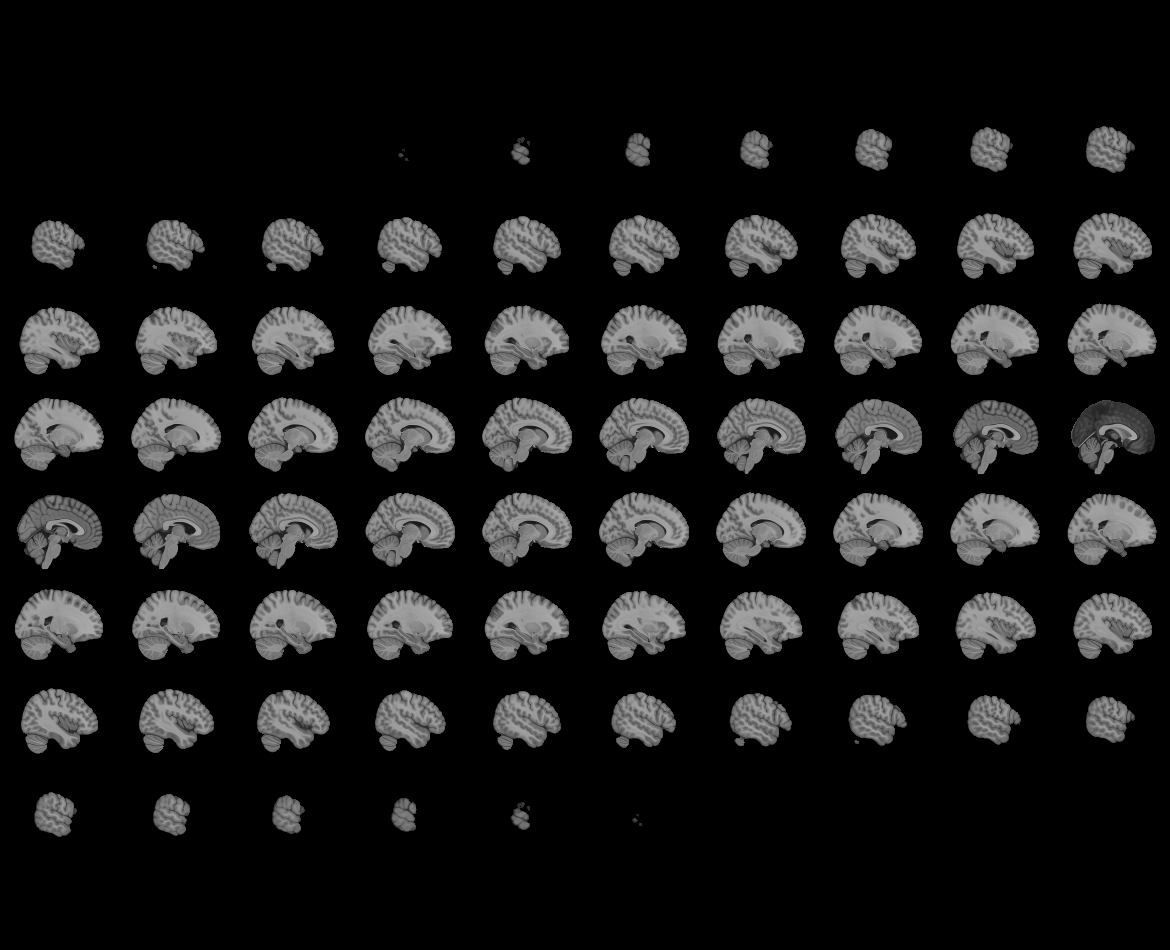
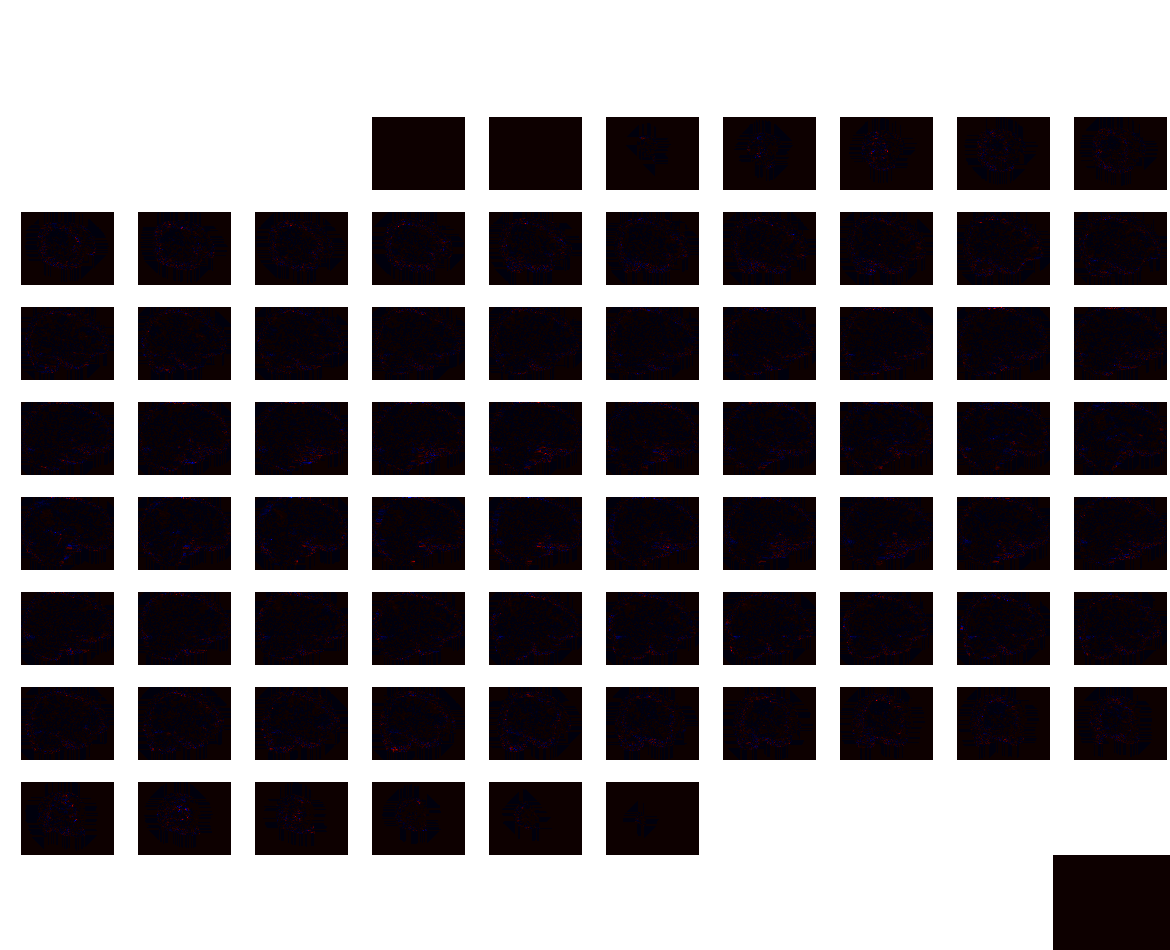

In [105]:
from nilearn import plotting
from nilearn import image
mean_image = image.mean_img(img)
plotting.view_img(mean_image, threshold=None)

Coordinates of the slice we are interested in each direction. We will be using them for visualization.


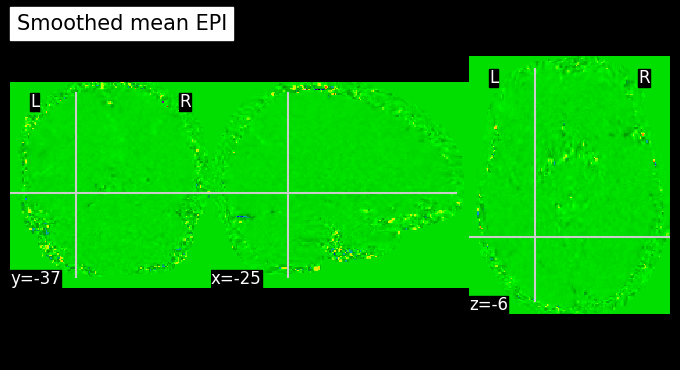

In [91]:
from nilearn.plotting import plot_epi

# cut in x-direction
sagittal = -25
# cut in y-direction
coronal = -37
# cut in z-direction
axial = -6

# coordinates displaying should be prepared as a list
cut_coords = [sagittal, coronal, axial]
plot_epi(mean_image, title="Smoothed mean EPI", cut_coords=cut_coords)

In [28]:
# anatomical nifti
anat_mri_file = '/kaggle/input/subj-1-aseg/subj_1_aseg.nii'
anat_img = nib.load(anat_mri_file)
anat_img_data = anat_img.get_fdata()
print(type(anat_img_data))  # it's a numpy array!
print(anat_img_data.shape)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


<class 'numpy.memmap'>
(145, 186, 148)


In [92]:
from nilearn import datasets
msdl_atlas = datasets.fetch_atlas_msdl(data_dir='/kaggle/working')
msdl_coords = msdl_atlas.region_coords
n_regions = len(msdl_coords)

print(f'MSDL has {n_regions} ROIs, part of the following networks :\n{np.unique(msdl_atlas.networks)}.')

MSDL has 39 ROIs, part of the following networks :
['Ant IPS' 'Aud' 'Basal' 'Cereb' 'Cing-Ins' 'D Att' 'DMN' 'Dors PCC'
 'L V Att' 'Language' 'Motor' 'Occ post' 'R V Att' 'Salience' 'Striate'
 'Temporal' 'Vis Sec'].


In [94]:
from nilearn.maskers import NiftiLabelsMasker
from nilearn import maskers

# Instantiate the masker with label image and label values
masker = maskers.NiftiMapsMasker(
    msdl_atlas.maps,resampling_target="data",memory="nilearn_cache_",memory_level=1, detrend=True).fit()
# Visualize the atlas
# Note that we need to call fit prior to generating the mask


# At this point, no functional image has been provided to the masker.
# We can still generate a report which can be displayed in a Jupyter
# Notebook, opened in a browser using the .open_in_browser() method,
# or saved to a file using the .save_as_html(output_filepath) method.
#report = masker.generate_report()
#report

In [96]:
roi_time_series = masker.transform(img)
roi_time_series.shape

(125, 39)

In [100]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([roi_time_series])[0]

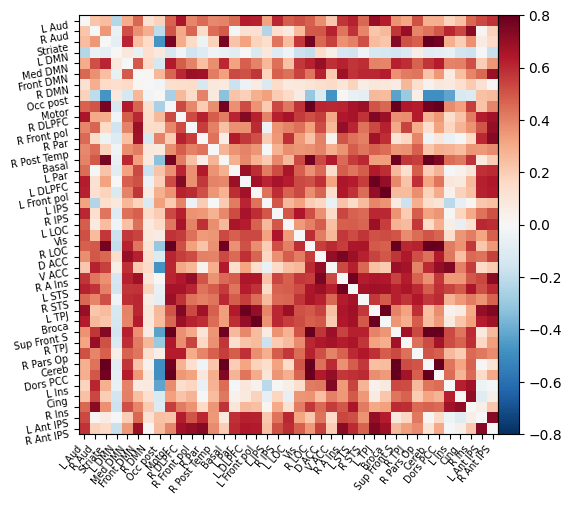

In [101]:
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=msdl_atlas.labels,
                     vmax=0.8, vmin=-0.8, colorbar=True)

In [102]:
plotting.view_connectome(correlation_matrix, edge_threshold=0.2,
                         node_coords=msdl_atlas.region_coords)